In [24]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [25]:
# evalys requires pandas==0.25.3
# %matplotlib inline
from pandas import read_csv
import matplotlib
from evalys.jobset import JobSet

In [26]:
input_location = 'KTH-1000-workloads/workload-1_backfill-1'
# input_location = 'out'

In [27]:
schedule = read_csv('../output/' + input_location + '_schedule.csv')
schedule.T

,0
batsim_version,3.1.0
consumed_joules,0
makespan,903637
max_slowdown,2730.7
max_turnaround_time,245520
max_waiting_time,164989
mean_slowdown,25.0432
mean_turnaround_time,7453.7
mean_waiting_time,3128.99
nb_computing_machines,109


In [28]:
js = JobSet.from_csv('../output/' + input_location + '_jobs.csv')
js.df.drop(['consumed_energy', 'metadata'], axis=1, inplace=True)
df = js.df.sort_values(by=['submission_time'])
df

,jobID,workload_name,profile,submission_time,requested_number_of_resources,requested_time,success,final_state,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,allocated_resources,proc_alloc
65,15,w0,15,1.0,4,53940.0,1,COMPLETED_SUCCESSFULLY,1.0,3477.000150,3478.000150,0.0,3477.000150,1.0,"[0, 18, 28, 38]",4
76,16,w0,16,173.0,25,3600.0,1,COMPLETED_SUCCESSFULLY,173.0,2488.000200,2661.000200,0.0,2488.000200,1.0,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21...",25
87,17,w0,17,627.0,5,215400.0,1,COMPLETED_SUCCESSFULLY,627.0,215337.000250,215964.000250,0.0,215337.000250,1.0,"[32, 33, 34, 35, 36]",5
98,18,w0,18,987.0,17,36000.0,1,COMPLETED_SUCCESSFULLY,987.0,35373.000200,36360.000200,0.0,35373.000200,1.0,"[37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 5...",17
109,19,w0,19,4081.0,8,2400.0,1,COMPLETED_SUCCESSFULLY,4081.0,29.000150,4110.000150,0.0,29.000150,1.0,"[0, 18, 28, 38, 48, 58, 68, 78]",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,1010,w0,1010,793416.0,2,300.0,1,COMPLETED_SUCCESSFULLY,793416.0,30.000100,793446.000100,0.0,30.000100,1.0,"[83, 84]",2
13,1011,w0,1011,793697.0,1,2700.0,1,COMPLETED_SUCCESSFULLY,793697.0,2648.000000,796345.000000,0.0,2648.000000,1.0,[0],1
14,1012,w0,1012,795458.0,4,600.0,1,COMPLETED_SUCCESSFULLY,795458.0,3.282867,795461.282867,0.0,3.282867,1.0,"[87, 88, 89, 90]",4
15,1013,w0,1013,797601.0,1,21600.0,1,COMPLETED_SUCCESSFULLY,797601.0,18256.000000,815857.000000,0.0,18256.000000,1.0,[0],1


In [29]:
js.df.describe()

,submission_time,requested_number_of_resources,requested_time,success,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,proc_alloc
count,1000.000000,1000.000000,1000.000000,1000.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,1000.000000
mean,331702.810000,10.440000,6729.300000,0.962000,333775.195288,4342.078689,338117.273977,3141.557738,7483.636427,25.143728,10.117000
std,225300.048046,15.457469,19764.430784,0.191292,226334.110037,17288.118144,228528.907205,12170.125780,22257.392864,157.418321,14.814073
min,1.000000,1.000000,60.000000,0.000000,1.000000,2.000000,2661.000200,0.000000,2.000000,1.000000,0.000000
25%,169562.750000,2.000000,180.000000,1.000000,175052.750100,20.000000,180124.750125,0.000000,23.000075,1.000000,2.000000
50%,280651.500000,4.000000,600.000000,1.000000,281096.500000,55.621747,286489.500000,0.000000,173.857980,1.000000,4.000000
75%,522195.750000,10.000000,3600.000000,1.000000,522405.001500,868.250100,524244.253413,120.500937,2720.750350,1.587591,10.000000
max,797845.000000,84.000000,215400.000000,1.000000,893886.000250,215337.000250,903637.000600,164989.000250,245520.360311,2730.698661,84.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83fadc7e20>,
      dtype=object)

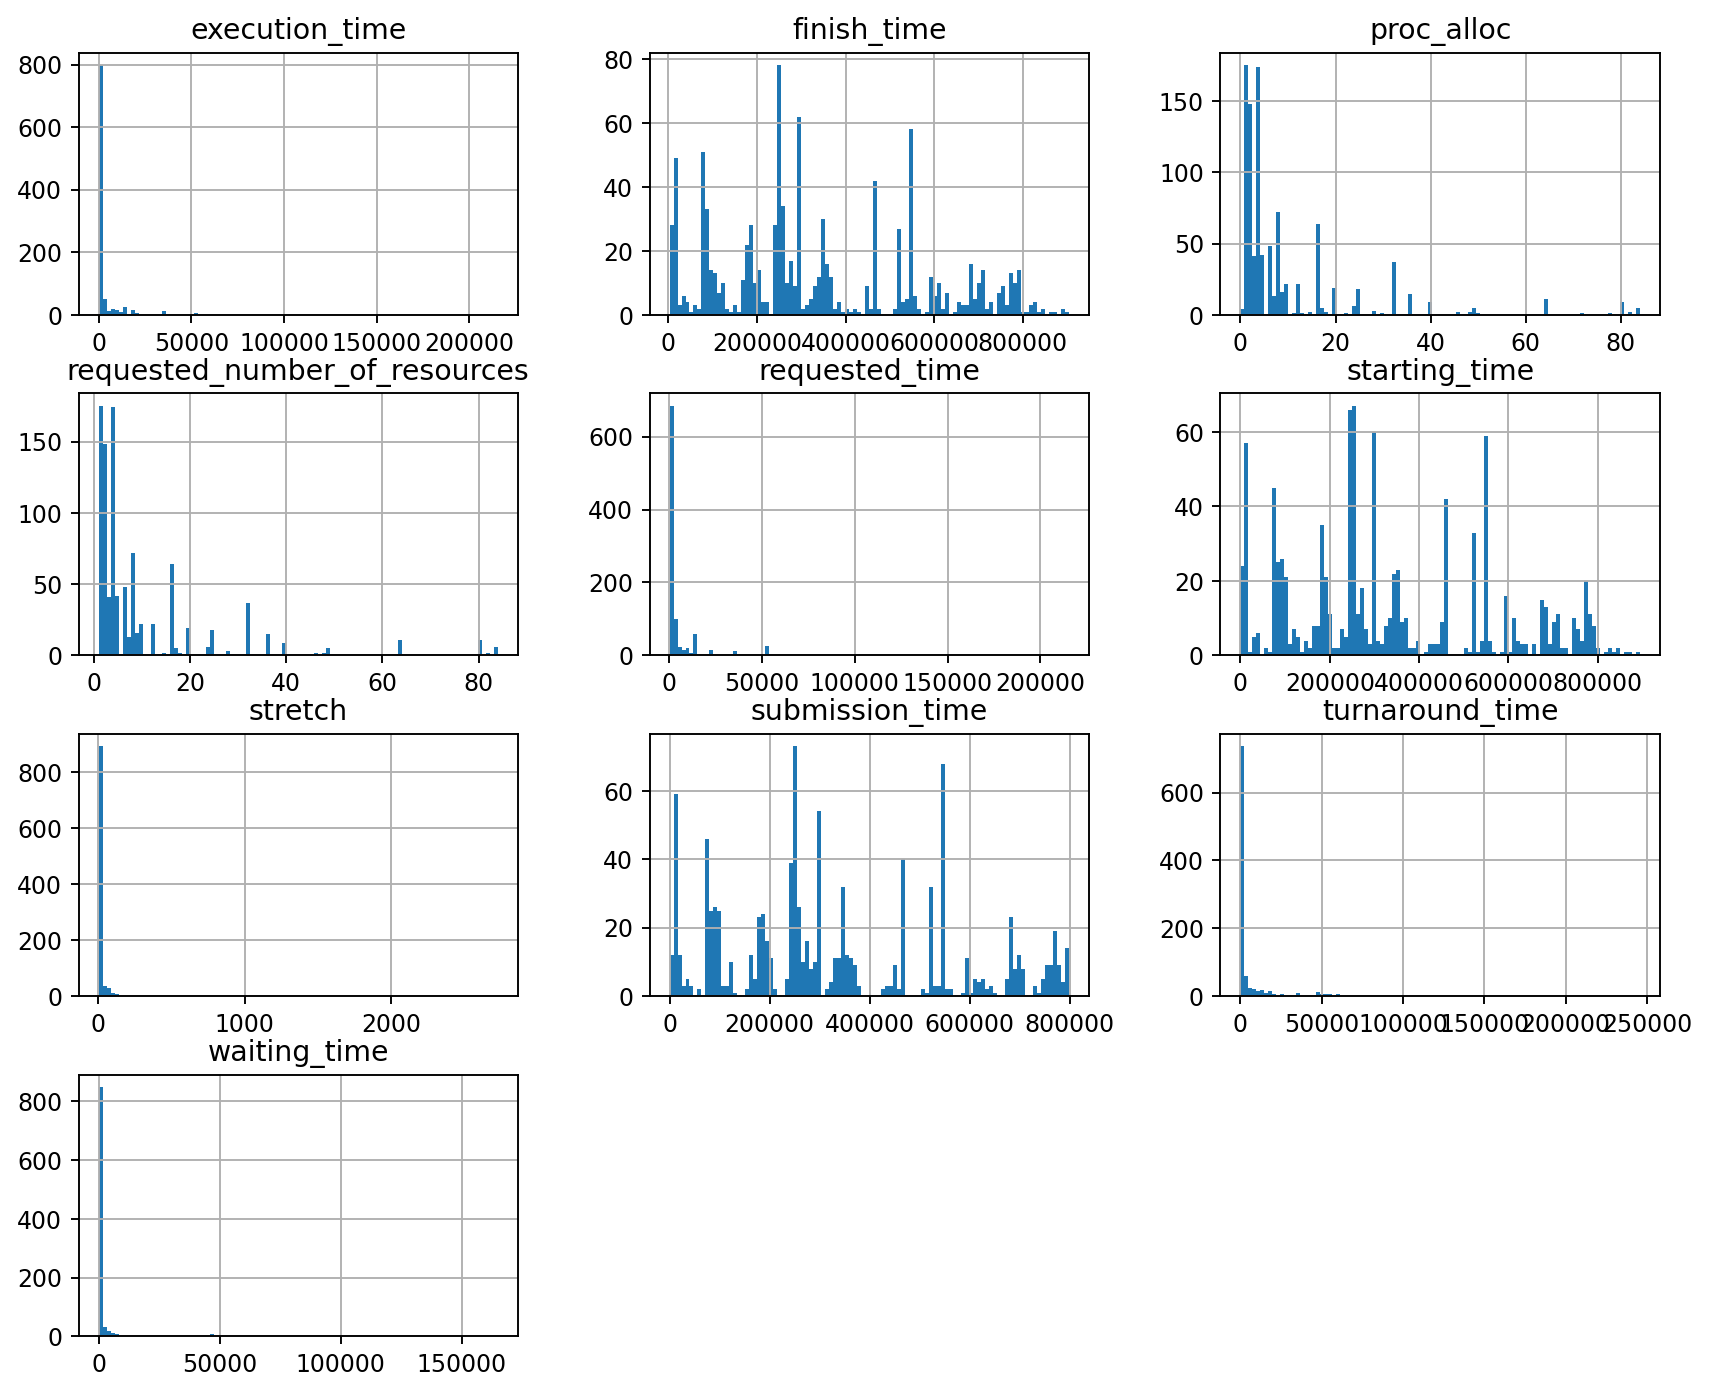

In [30]:
matplotlib.rcParams['figure.dpi']= 170
df = js.df.drop(['success'], axis=1)
df.hist(figsize=(12, 10), bins=100)

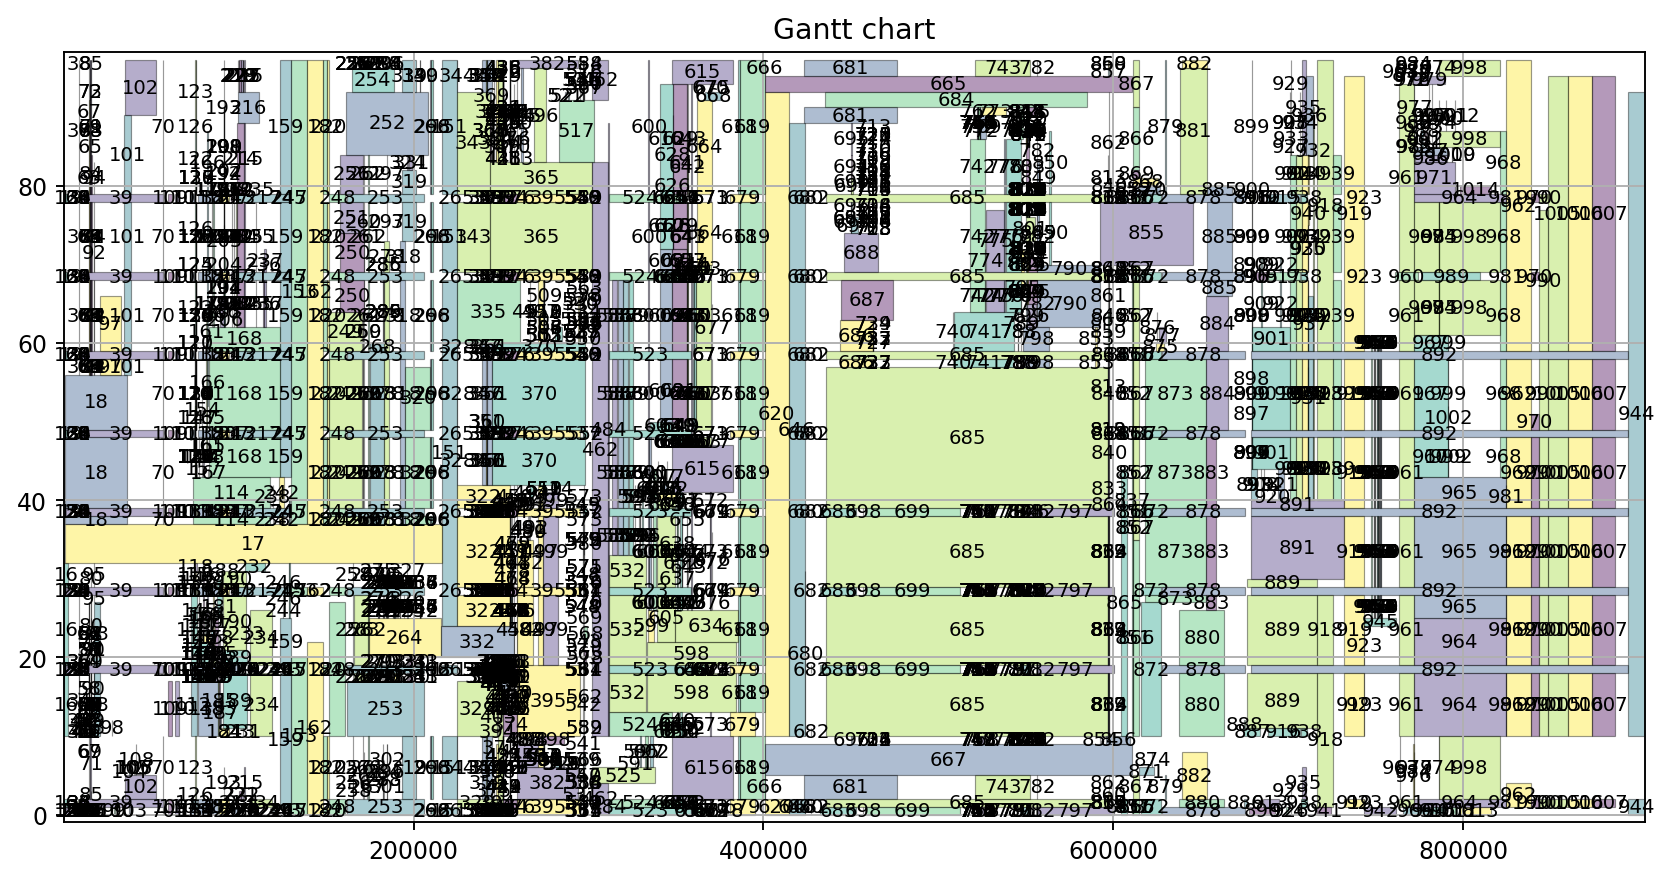

In [31]:
matplotlib.rcParams['figure.figsize'] = 12, 6
matplotlib.rcParams['figure.dpi']= 170
js.gantt()

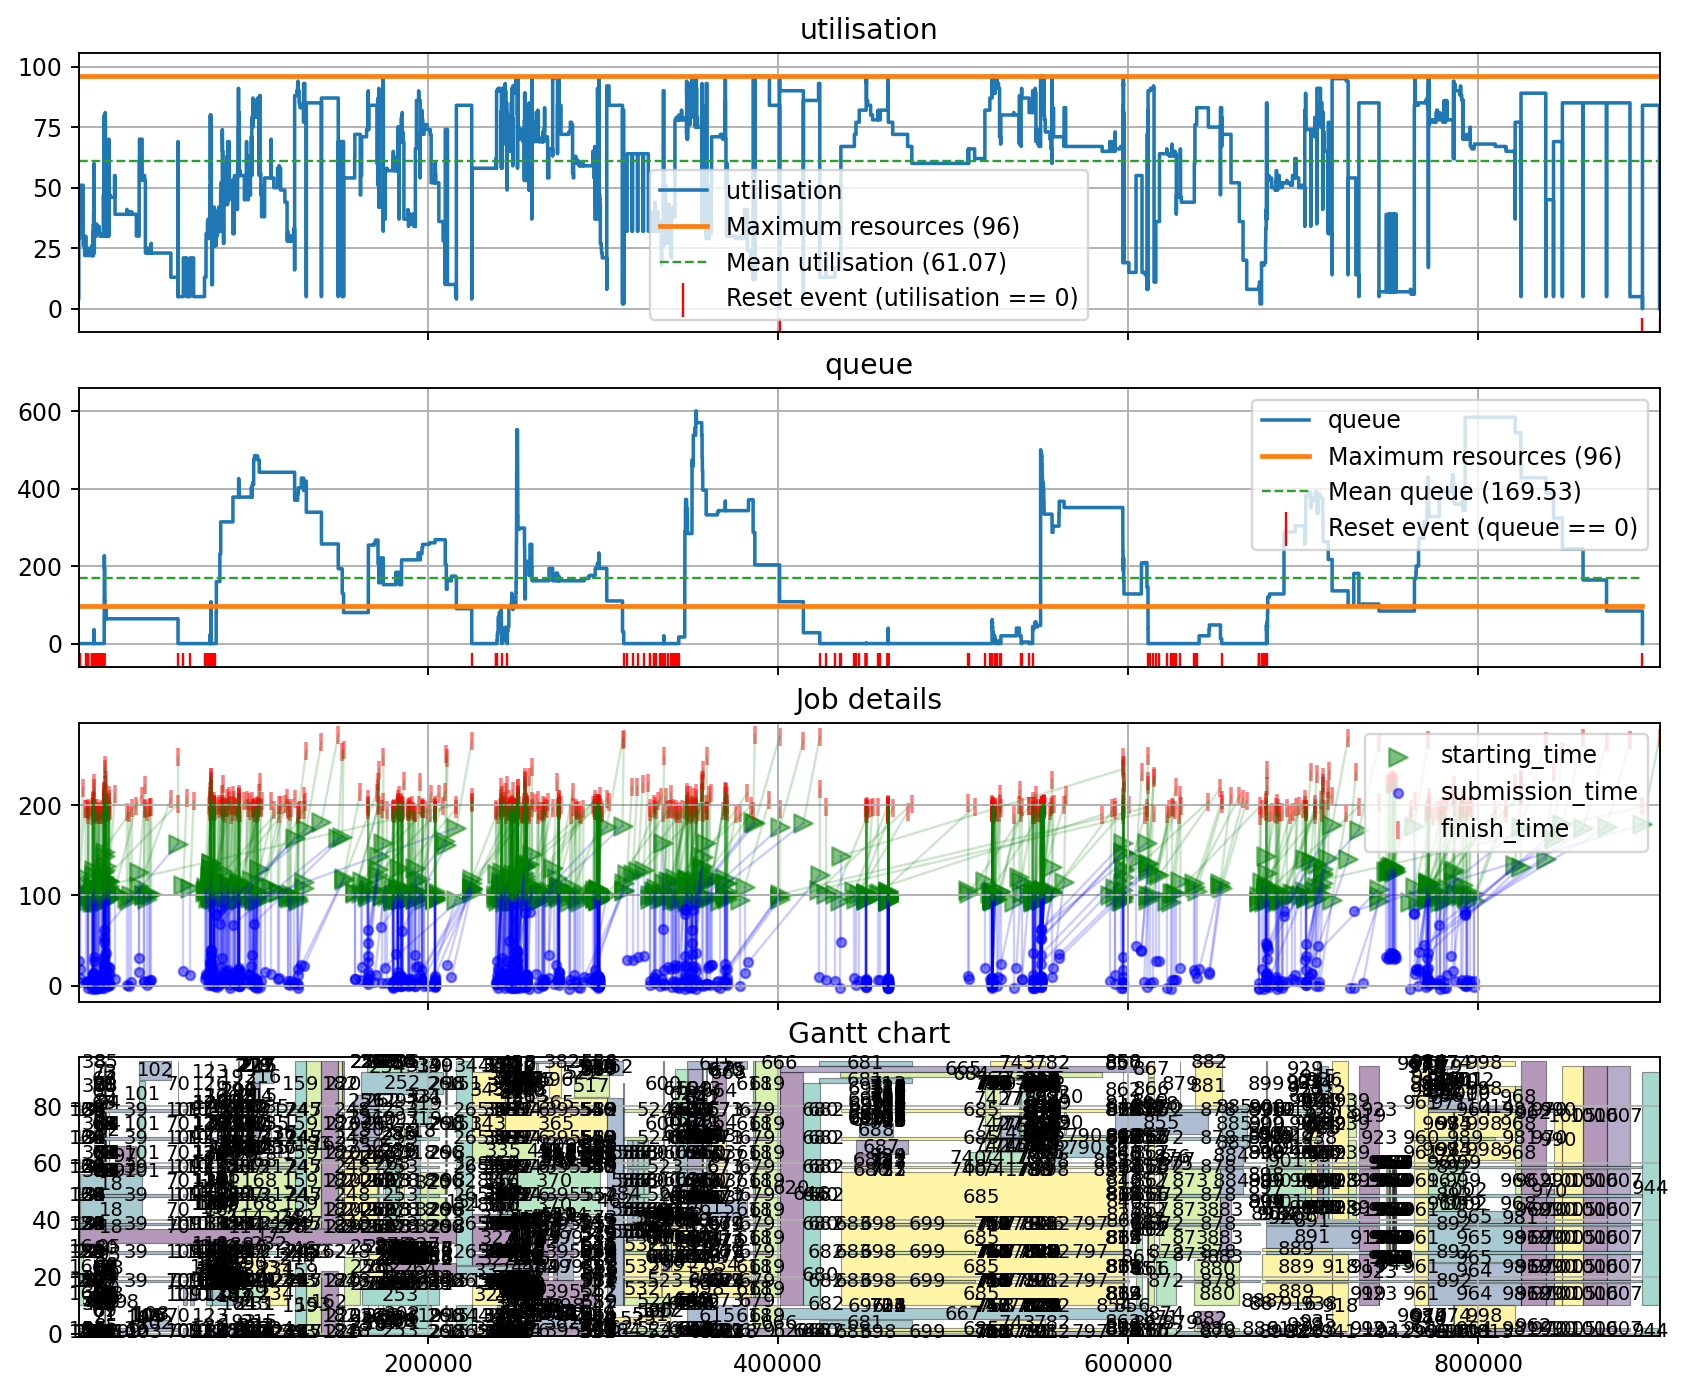

In [32]:
matplotlib.rcParams['figure.figsize'] = 12, 10
matplotlib.rcParams['figure.dpi']= 170
js.plot(with_details=True)